In [46]:
import pandas as pd
import seaborn as sns

In [47]:
athlete_events_df = pd.read_csv("athlete_events.csv")
athlete_events_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [48]:
# How many total unique participants (use ID column) were present at the London 2012 Games?
unique_participants = athlete_events_df["ID"].nunique()
unique_participants

135571

In [49]:
#How many total unique males and total unique females participants were at the Beijing 2008 games?
athlete_events_males_df = athlete_events_df[athlete_events_df["Sex"] == "M"]
unique_male_participants = athlete_events_males_df["ID"].nunique()
unique_male_participants

101590

In [50]:
athlete_events_females_df = athlete_events_df[athlete_events_df["Sex"] == "F"]
unique_female_participants = athlete_events_females_df["ID"].nunique()
unique_female_participants


33981

In [51]:
#List the top 10 athletes with the most medals
medals_df = athlete_events_df.dropna().groupby("Name").agg(
    num_medals = ("Medal", "count")
)
medals_df.sort_values(["num_medals"], ascending=False).head(10)

,num_medals
Name,
"Michael Fred Phelps, II",28
Larysa Semenivna Latynina (Diriy-),18
Nikolay Yefimovich Andrianov,15
Ole Einar Bjrndalen,13
Borys Anfiyanovych Shakhlin,13
Takashi Ono,13
"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
Sawao Kato,12
Natalie Anne Coughlin (-Hall),12


<AxesSubplot:xlabel='Year', ylabel='Nations'>

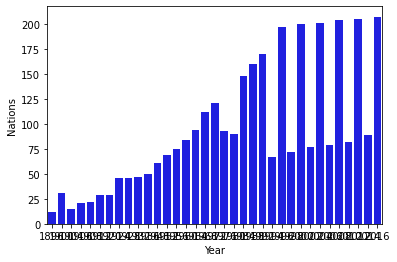

In [52]:
# Make a bar chart (blue color) that shows how many nations participated in each year of the Olympics
athlete_events_nations_df = athlete_events_df.groupby("Year").agg(
    Nations = ("NOC", "nunique")
)
athlete_events_nations_df = athlete_events_nations_df.reset_index()
sns.barplot(
    data = athlete_events_nations_df,
    x = "Year",
    y = "Nations",
    color = "blue"
)